<a href="https://colab.research.google.com/github/H-coder50/AI-Job-Salary-Pridiction-/blob/main/CNN_Handwriting_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import libraries:**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

# **Load Data:**

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


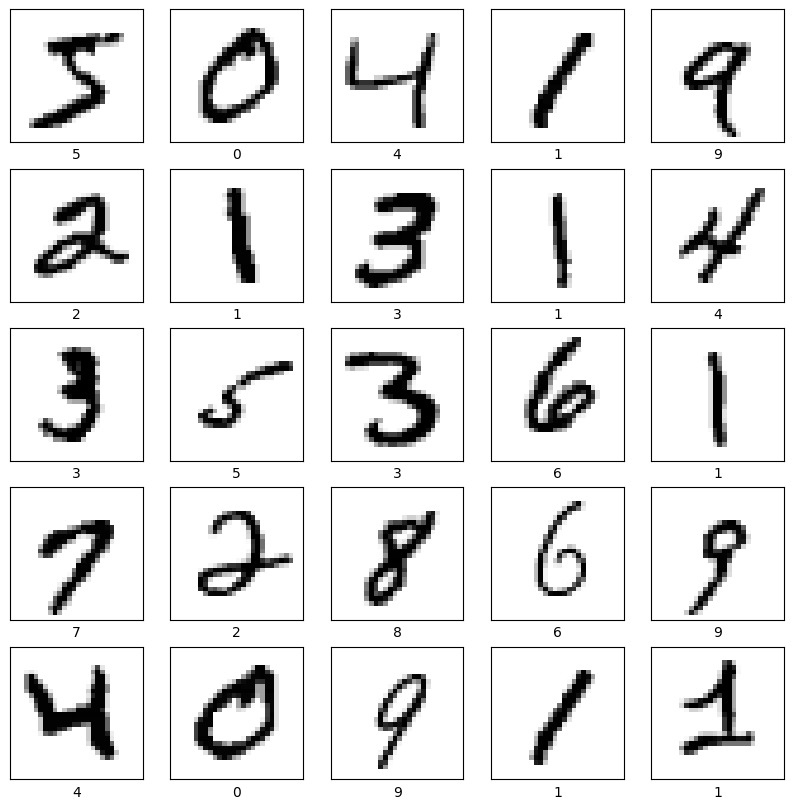

In [ ]:
# display some sample images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [ ]:
# shape
x_train.shape, y_train.shape, x_test.shape, y_test.shape
# x_train.shape(60000 images, 28,28 pixel) y_train.shape(60000 labels)
# x_test.shape(10000 images, 28,28 pixel) y_test.shape(10000 labels)

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
# Reshape the data as we do not have 3rd value of an image
x_train = x_train.reshape(x_train.shape+(1,))
x_test = x_test.reshape(x_test.shape+(1,))
x_train.shape, x_test.shape
# reshape comand laga k +1 karenge b/c ye black & white pic hy (color k ley 1)
# 1 shows black and white hy ya nahi
# 3 show ho ga RGB  kley

((60000, 28, 28, 1), (10000, 28, 28, 1))

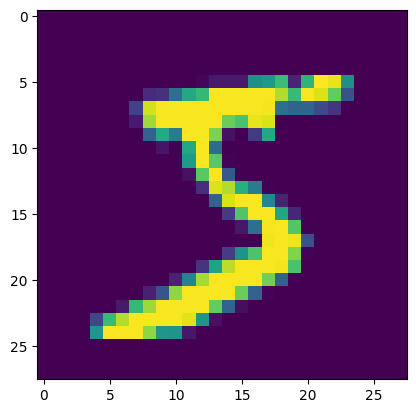

In [ ]:
# show any image from 70000 images by using its index[0]
plt.imshow(x_train[0])


In [ ]:
# Display the value of each pixel in the image
print('Pixel Values:')
for row in x_train[0]:
    for pixel_value in row:
        print("{:3}".format(pixel_value[0]), end=' ')
    print()

Pixel Values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   

# **Normalize Data:**

- pixel range (o - 255)
- every pixel have its own value
- we normalize its range between (0 - 1), we divide it from 255


In [ ]:
# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# Now check shape
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [ ]:
# Print pixel values with 2 decimal places
for row in x_train[0]:
    for pixel_value in row:
        print(f"{pixel_value[0]:.3f}", end=' ')
    print()


0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.012 0.071 0.071 0.071 0.494 0.533 0.686 0.102 0.651 1.000 0.969 0.498 0.000 0.000

# **Build CNN Model:**

In [ ]:

# Build the CNN model
model = tf.keras.Sequential([
    layers.Input(shape=(28, 28, 1)),    # input layer 28x28 pixel images with 1 color chennel (grayscale)
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),# Extracts 10 feature maps using 3×3 filters
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),# Further extracts features
    layers.MaxPooling2D(pool_size=(2, 2)), # Downsamples to reduce size
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(), #Converts 2D feature maps to 1D vector
    layers.Dense(units=10, activation='softmax') # Outputs class probabilities for 10 classes
])

- **kernal_size:** A small matrix used in convolution operations to detect specific features in input data (e.g., edges in images).
aik window ki taraha matrix image pixel se guzarta hy or aik dot product deta hy.Dot prodeuct means aik big matrix se aik small matrix me convert.
- **Filters:** (also called kernels) are small grids of numbers used to scan across the image and detect patterns like edges, textures, or shapes..kitni bar window guzarni hy ye value likhte hen.
-  **Conv2D**(filters=10, kernel_size=(3, 3)), you're applying 10 different 3×3 filters to extract 10 feature maps.
- **MaxPooling2D** is a downsampling operation that reduces the size of feature maps while keeping the most important information.
- MaxPooling2D(pool_size=(2, 2)) shrinks the feature map by half in both dimensions.



In [ ]:
# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 10)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,440 (17.34 KB)

 Trainable params: 4,440 (17.34 KB)

 Non-trainable params: 0 (0.00 B)

- **Param:** Number of parameters in each layer

# **Compile Model:**

In [ ]:
# compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


- **optimizer** → The optimizer is the algorithm that adjusts the model’s weights during training to minimize the loss function.
- **loss** → what the model tries to minimize
- **metrics** → find (accuracy)


# **Train Model:**

In [ ]:
# train model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7874 - loss: 0.6523 - val_accuracy: 0.9641 - val_loss: 0.1235
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.9667 - loss: 0.1129 - val_accuracy: 0.9760 - val_loss: 0.0807
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.9764 - loss: 0.0761 - val_accuracy: 0.9772 - val_loss: 0.0752
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.9802 - loss: 0.0641 - val_accuracy: 0.9814 - val_loss: 0.0617
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9836 - loss: 0.0550 - val_accuracy: 0.9820 - val_loss: 0.0565
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9859 - loss: 0.0489 - val_accuracy: 0.9843 - val_loss: 0.0485
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.9869 - loss: 0.0395 - val_accuracy: 0.9856 - val_loss: 0.0494
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9879 -

- **Epochs:**  One epoch means one full pass of the training dataset through the neural network.

- **batch_size:** The number of samples processed before the model updates its weights.

- **validation_split:**  Fraction of the training data set aside for validation (checking performance on unseen data during training).


# **Evaluate the Model on Test data:**

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:}")
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9865 - loss: 0.0385
Test Loss: 0.031097855418920517
Test Accuracy: 0.9898999929428101


# **Plot loss & accuracy:**

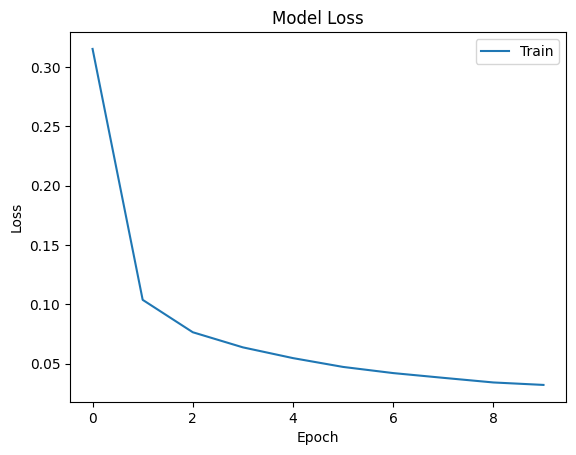

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

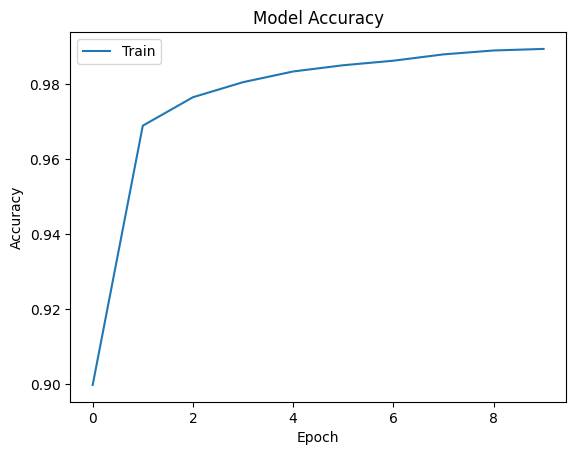

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# **Predict Model:**

In [ ]:
# predict model
prediction = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [ ]:
# jo predict kiya hy uska label is me se hy
# According to sofmax function 1 max value out of 10
prediction[0]

array([4.3312379e-10, 2.0088549e-08, 3.4150324e-07, 1.0768076e-05,
       2.6308355e-13, 2.1815407e-11, 3.6209449e-16, 9.9998862e-01,
       8.3471513e-10, 2.6466347e-07], dtype=float32)

In [ ]:
# argmax function se value a jaygi jo predict hoi
np.argmax(prediction[0])

np.int64(7)

# **Classification Rport:**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("classification report : \n", classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
classification report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       1.00      0.98      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# **Plot Train & Test Accuracy:**

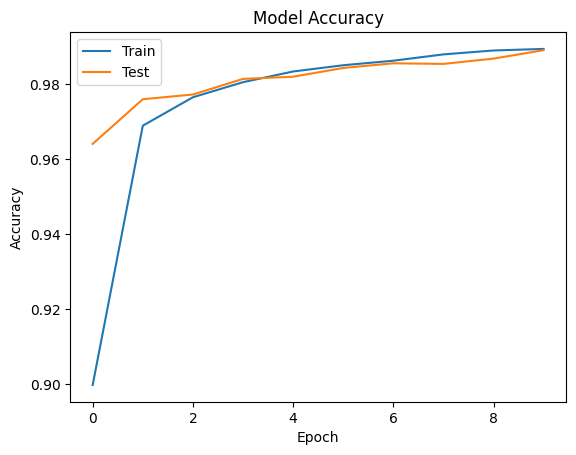

In [ ]:
# plot for train and test accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
